# **Problem Research**

**Problem Statement**

Home Credit aims to optimize its lending process by minimizing the number of customers approved for loans who eventually default on their payments. The company seeks to develop strategies or predictive models that effectively evaluate customer creditworthiness,

**Goal**

Minimize number of customers authorized for approval but who ultimately default

**Objectives**
- Identifying the characteristics of customer defaulters
- Building a machine learning (ML) model that can predict customers who have the potential to become customer defaulters

**Model Evaluation**

Precision of the model in predicting customer defaulters on a loan or making a purchase.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

os.chdir('/content/drive/MyDrive/home-credit-default-risk')
os.getcwd()

# loading dataset
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#**STAGE 1 - EDA**

## 1.) Descriptive Statistics

In [4]:
# checking the shape of the dataset
df.shape

(307511, 122)

In [5]:
# check data types
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# cek missing value
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [7]:
# check data duplicated
df.duplicated().sum()

np.int64(0)

In [8]:
numerical_column = df.select_dtypes(include=['int', 'float'])
categorical_column = df.astype(str)

In [9]:
# statistics summary
numerical_column.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
categorical_column.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,307511,2,2,3,2,2,15,2548,5603,13673,...,2,2,2,2,6,10,10,25,12,26
top,456255,0,Cash loans,F,N,Y,0,135000.0,450000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,282686,278232,202448,202924,213312,215371,35750,9709,6385,...,305011,307328,307355,307408,264366,264503,257456,222233,215417,71801


## 2.) Business Insight

### Jumlah AMT_REQ_CREDIT_BUREAU_YEAR berdasarkan Kesulitan Membayar atau Tidak

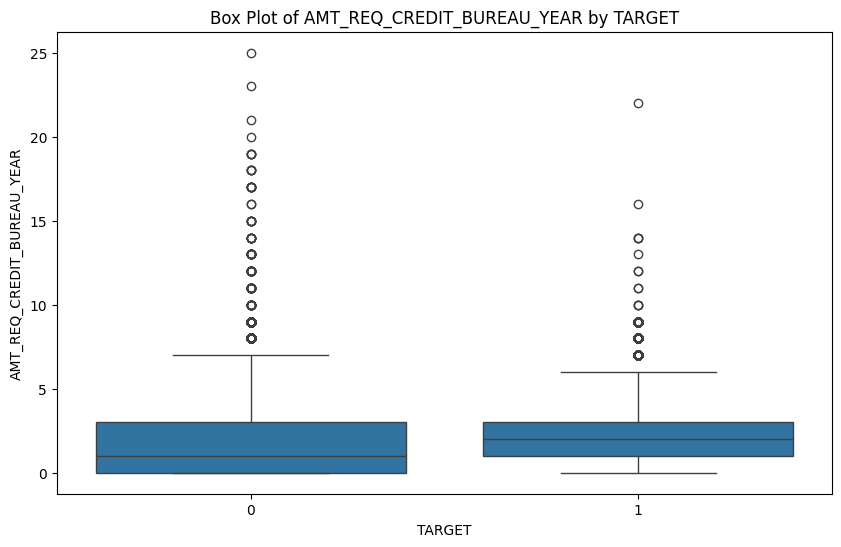

In [11]:
# EDA
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_REQ_CREDIT_BUREAU_YEAR', data=df)
plt.title('Box Plot of AMT_REQ_CREDIT_BUREAU_YEAR by TARGET')
plt.xlabel('TARGET')
plt.ylabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

### CNT_CHILDREN berdasarkan Kesulitan Membayar atau Tidak

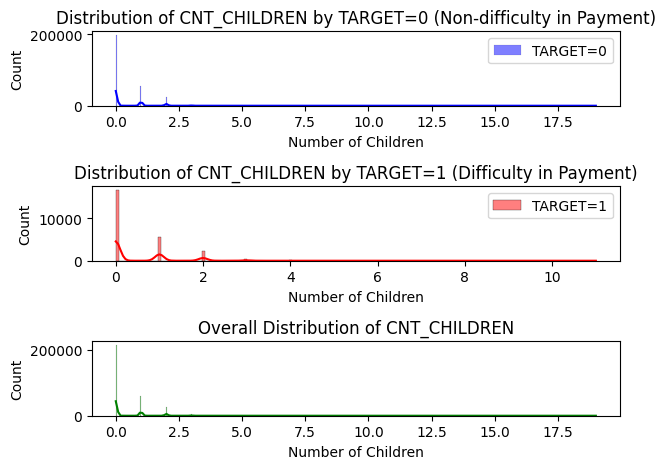

In [12]:
# Histogram for TARGET = 0
plt.subplot(3, 1, 1)
sns.histplot(data=df[df['TARGET'] == 0], x='CNT_CHILDREN', color='blue', kde=True, label='TARGET=0')
plt.title('Distribution of CNT_CHILDREN by TARGET=0 (Non-difficulty in Payment)')
plt.xlabel('Number of Children')
plt.legend()

# Histogram for TARGET = 1
plt.subplot(3, 1, 2)
sns.histplot(data=df[df['TARGET'] == 1], x='CNT_CHILDREN', color='red', kde=True, label='TARGET=1')
plt.title('Distribution of CNT_CHILDREN by TARGET=1 (Difficulty in Payment)')
plt.xlabel('Number of Children')
plt.legend()

# Overall Distribution
plt.subplot(3, 1, 3)
sns.histplot(data=df, x='CNT_CHILDREN', color='green', kde=True)
plt.title('Overall Distribution of CNT_CHILDREN')
plt.xlabel('Number of Children')

plt.tight_layout()
plt.show()

### FLAG_PHONE berdasarkan Kesulitan Membayar atau Tidak

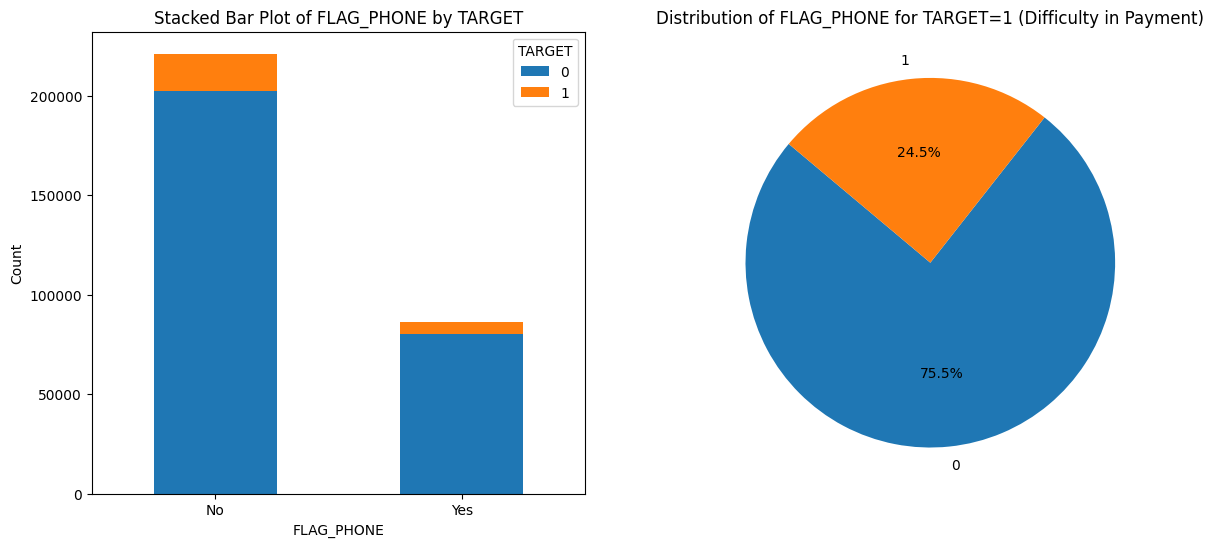

In [13]:
cross_table = pd.crosstab(df['FLAG_PHONE'], df['TARGET'])

# Create a stacked bar plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar plot
cross_table.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Stacked Bar Plot of FLAG_PHONE by TARGET')
ax[0].set_xlabel('FLAG_PHONE')
ax[0].set_ylabel('Count')
ax[0].legend(title='TARGET', loc='upper right')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Pie chart for TARGET=1 with FLAG_PHONE
target_1_counts = df[df['TARGET'] == 1]['FLAG_PHONE'].value_counts()
ax[1].pie(target_1_counts, labels=target_1_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of FLAG_PHONE for TARGET=1 (Difficulty in Payment)')

plt.show()

### OBS_30_CNT_SOCIAL_CIRCLE berdasarkan Kesulitan Membayar atau Tidak

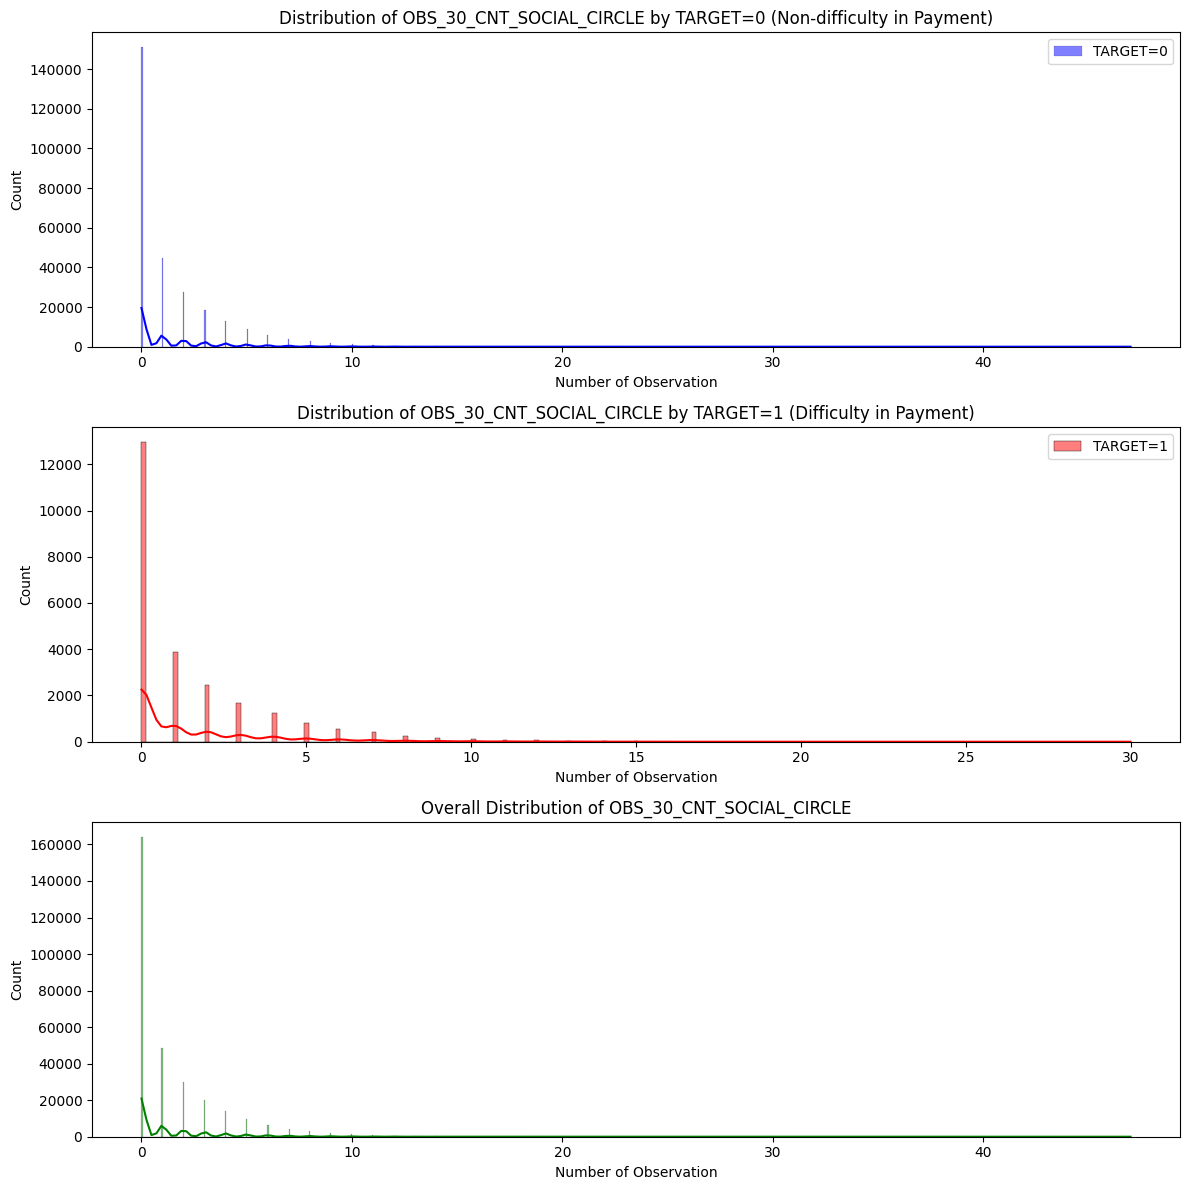

In [14]:
# Filter out values greater than 50 in OBS_30_CNT_SOCIAL_CIRCLE column (> 50 assumed as outlier)
filtered_df = df[df['OBS_30_CNT_SOCIAL_CIRCLE'] <= 50]

plt.figure(figsize=(12, 12))

# Histogram for TARGET = 0
plt.subplot(3, 1, 1)
sns.histplot(data=filtered_df[filtered_df['TARGET'] == 0], x='OBS_30_CNT_SOCIAL_CIRCLE', color='blue', kde=True, label='TARGET=0')
plt.title('Distribution of OBS_30_CNT_SOCIAL_CIRCLE by TARGET=0 (Non-difficulty in Payment)')
plt.xlabel('Number of Observation')
plt.legend()

# Histogram for TARGET = 1
plt.subplot(3, 1, 2)
sns.histplot(data=filtered_df[filtered_df['TARGET'] == 1], x='OBS_30_CNT_SOCIAL_CIRCLE', color='red', kde=True, label='TARGET=1')
plt.title('Distribution of OBS_30_CNT_SOCIAL_CIRCLE by TARGET=1 (Difficulty in Payment)')
plt.xlabel('Number of Observation')
plt.legend()

# Overall Distribution
plt.subplot(3, 1, 3)
sns.histplot(data=filtered_df, x='OBS_30_CNT_SOCIAL_CIRCLE', color='green', kde=True)
plt.title('Overall Distribution of OBS_30_CNT_SOCIAL_CIRCLE')
plt.xlabel('Number of Observation')

plt.tight_layout()
plt.show()

### FLAG_OWN_REALTY berdasarkan Kesulitan Membayar atau Tidak

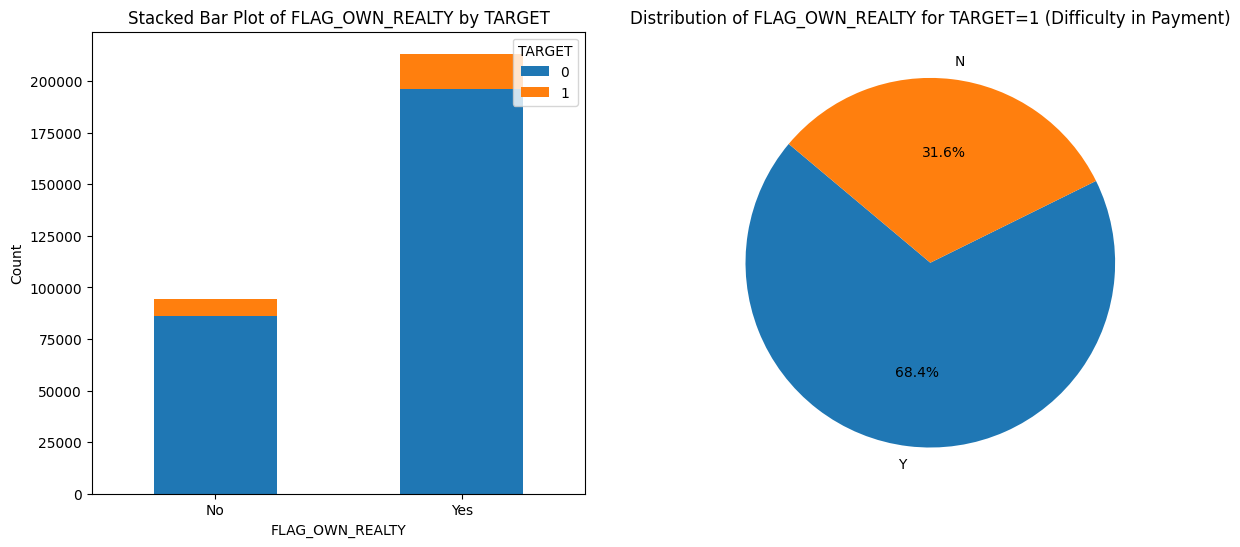

In [15]:
cross_table = pd.crosstab(df['FLAG_OWN_REALTY'], df['TARGET'])

# Create a stacked bar plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar plot
cross_table.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Stacked Bar Plot of FLAG_OWN_REALTY by TARGET')
ax[0].set_xlabel('FLAG_OWN_REALTY')
ax[0].set_ylabel('Count')
ax[0].legend(title='TARGET', loc='upper right')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Pie chart for TARGET=1 with FLAG_OWN_REALTY
target_1_counts = df[df['TARGET'] == 1]['FLAG_OWN_REALTY'].value_counts()
ax[1].pie(target_1_counts, labels=target_1_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribution of FLAG_OWN_REALTY for TARGET=1 (Difficulty in Payment)')

plt.show()

### Umur berdasarkan Kesulitan Membayar atau Tidak

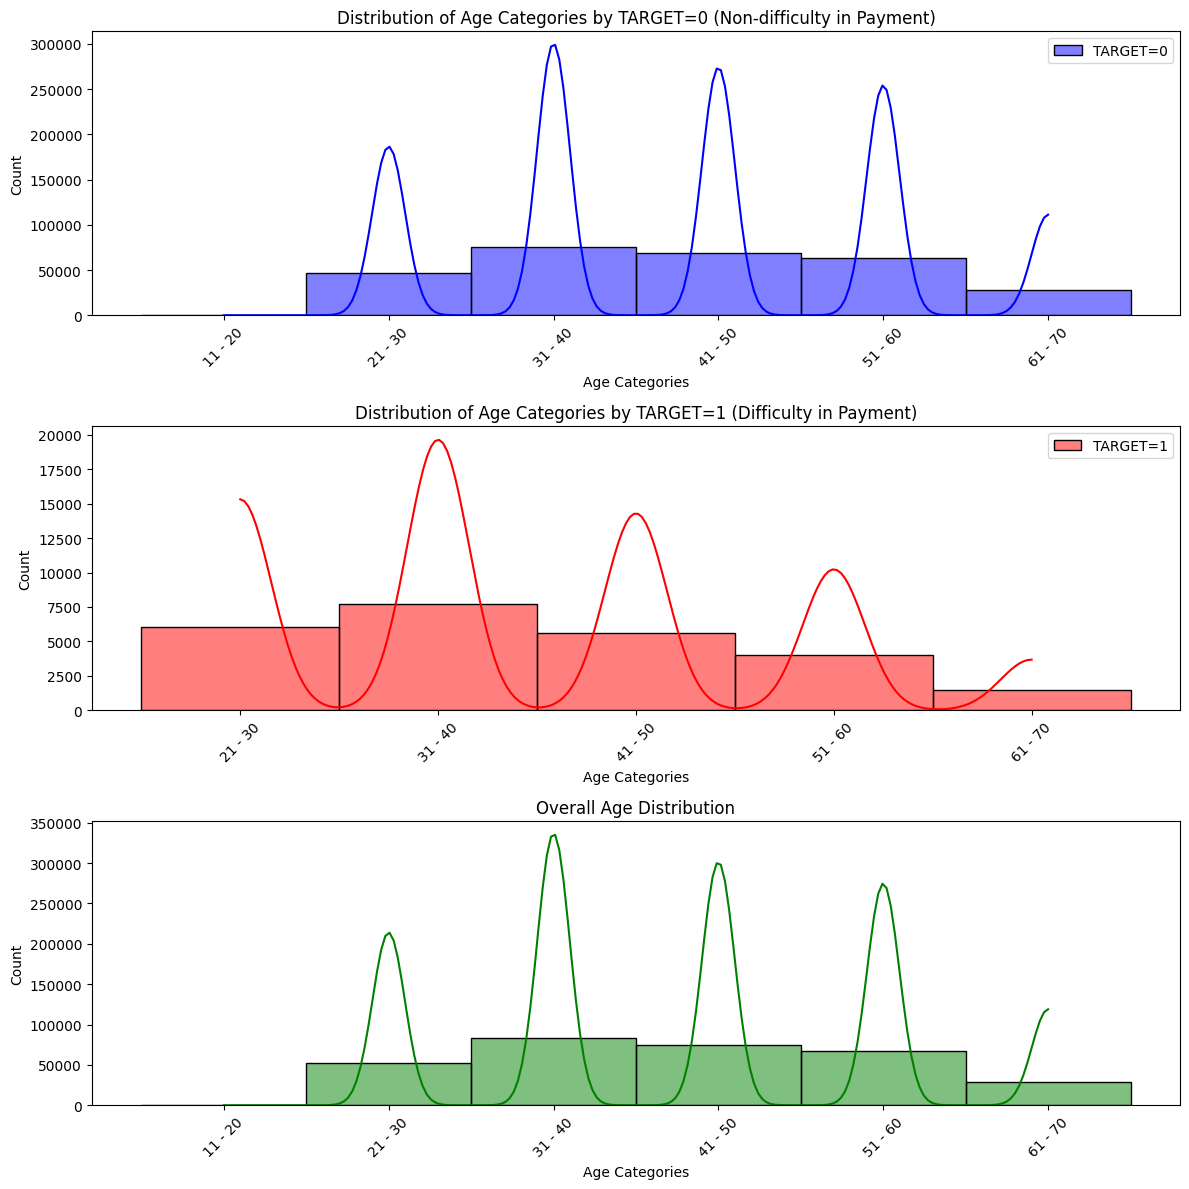

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DAYS_BIRTH to years and take absolute values
df['YEARS_BIRTH'] = abs(df['DAYS_BIRTH']) / 365

# Define age categories
age_bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
age_labels = ['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '81 - 90', '91 - 100']

# Histogram
plt.figure(figsize=(12, 12))

# Histogram for TARGET = 0
plt.subplot(3, 1, 1)
sns.histplot(data=df[df['TARGET'] == 0], x=pd.cut(df[df['TARGET'] == 0]['YEARS_BIRTH'], bins=age_bins, labels=age_labels), color='blue', kde=True, label='TARGET=0')
plt.title('Distribution of Age Categories by TARGET=0 (Non-difficulty in Payment)')
plt.xlabel('Age Categories')
plt.xticks(rotation=45)
plt.legend()

# Histogram for TARGET = 1
plt.subplot(3, 1, 2)
sns.histplot(data=df[df['TARGET'] == 1], x=pd.cut(df[df['TARGET'] == 1]['YEARS_BIRTH'], bins=age_bins, labels=age_labels), color='red', kde=True, label='TARGET=1')
plt.title('Distribution of Age Categories by TARGET=1 (Difficulty in Payment)')
plt.xlabel('Age Categories')
plt.xticks(rotation=45)
plt.legend()

# Overall Age Distribution
plt.subplot(3, 1, 3)
sns.histplot(data=df, x=pd.cut(df['YEARS_BIRTH'], bins=age_bins, labels=age_labels), color='green', kde=True)
plt.title('Overall Age Distribution')
plt.xlabel('Age Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **STAGE 2 - DATA PRE-PROCESSING**

## 1.) Data Cleansing

### Handle Duplicate Value

In [17]:
# Menampilkan jumlah data yang duplikat

df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat

### Handle Missing Value

In [18]:
# Menampilkan kolom yang memiliki null value

df.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519
AMT_REQ_CREDIT_BUREAU_YEAR,41519


In [19]:
# Drop kolom yang memiliki nilai null > 50%

threshold = len(df) * 0.5
cleaned_df = df.dropna(axis=1, thresh=threshold)
cleaned_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


In [20]:
# Mengisi null value dengan kolom numerikal dengan median dan kolom kategorikal dengan modus

for col in cleaned_df.columns:
    if cleaned_df[col].dtype == 'object':
        mode_val = cleaned_df[col].mode()[0]
        cleaned_df[col].fillna(mode_val, inplace=True)
    else:
        mean_val = cleaned_df[col].median()
        cleaned_df[col].fillna(mean_val, inplace=True)

In [21]:
cleaned_df.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_YEAR,0


Setiap kolom pada data sudah tidak memiliki null value

In [22]:
cleaned_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


## 2.) Feature Engineering

### Feature Selection

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [24]:
# Men-drop feature-feature yang tidak penting atau redundansi (berulang) terhadap taget
cleaned_df = cleaned_df.drop(['SK_ID_CURR', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                              'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                              'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'], axis=1)

In [25]:
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns
numerical_cols = cleaned_df.select_dtypes(exclude=['object']).columns

# Membuat value negative menjadi positive
cleaned_df[numerical_cols] = cleaned_df[numerical_cols].abs()

In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   NAME_CONTRACT_TYPE            307511 non-null  object 
 2   CODE_GENDER                   307511 non-null  object 
 3   FLAG_OWN_CAR                  307511 non-null  object 
 4   FLAG_OWN_REALTY               307511 non-null  object 
 5   CNT_CHILDREN                  307511 non-null  int64  
 6   AMT_INCOME_TOTAL              307511 non-null  float64
 7   AMT_CREDIT                    307511 non-null  float64
 8   AMT_ANNUITY                   307511 non-null  float64
 9   AMT_GOODS_PRICE               307511 non-null  float64
 10  NAME_TYPE_SUITE               307511 non-null  object 
 11  NAME_INCOME_TYPE              307511 non-null  object 
 12  NAME_EDUCATION_TYPE           307511 non-nul

### Feature Encoding

In [27]:
# Apply one-hot encoding to categorical columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(cleaned_df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

    # Concatenate numerical columns with encoded categorical columns
    cleaned_df = pd.concat([cleaned_df[numerical_cols], encoded_df], axis=1)
else:
    cleaned_df

In [28]:
cleaned_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3.) Split Data to Train and Test

In [29]:
from sklearn.model_selection import train_test_split
X = cleaned_df.loc[:, cleaned_df.columns != 'TARGET']
y = cleaned_df['TARGET']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 246008 entries, 123473 to 121958
Data columns (total 188 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    CNT_CHILDREN                                       int64  
 1    AMT_INCOME_TOTAL                                   float64
 2    AMT_CREDIT                                         float64
 3    AMT_ANNUITY                                        float64
 4    AMT_GOODS_PRICE                                    float64
 5    REGION_POPULATION_RELATIVE                         float64
 6    DAYS_BIRTH                                         int64  
 7    DAYS_EMPLOYED                                      int64  
 8    DAYS_REGISTRATION                                  float64
 9    DAYS_ID_PUBLISH                                    int64  
 10   FLAG_MOBIL                                         int64  
 11   FLAG_EMP_PHONE                       

## 4.) Feature Transformation

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Normalization
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 5.) Handle Class Imbalance

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek

# Oversampling SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test, y_test = SMOTE().fit_resample(x_test, y_test)

In [32]:
print(y_train.value_counts())

TARGET
0    226132
1    226132
Name: count, dtype: int64


# STAGE 3 - SUPERVISED LEARNING (CLASSIFICATION)

## 1.) Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Training model in data train
logistic_regression = LogisticRegression().fit(x_train, y_train)

In [34]:
# Predicting data train
y_train_prediction = logistic_regression.predict(x_train)

print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_prediction))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.70      0.70      0.70    226132
           1       0.70      0.71      0.70    226132

    accuracy                           0.70    452264
   macro avg       0.70      0.70      0.70    452264
weighted avg       0.70      0.70      0.70    452264



In [35]:
# Predicting data test
y_train_prediction = logistic_regression.predict(x_test)

print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_test, y_train_prediction))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     56554
           1       0.70      0.71      0.70     56554

    accuracy                           0.70    113108
   macro avg       0.70      0.70      0.70    113108
weighted avg       0.70      0.70      0.70    113108



In [36]:
logistic_regression_accuracy_train = round(logistic_regression.score(x_train, y_train)*100,2)
logistic_regression_accuracy_test = round(logistic_regression.score(x_test, y_test)*100,2)
print("Logistic Regression Training Accuracy (in %) = {}".format(logistic_regression_accuracy_train))
print("Logistic Regression Test Accuracy (in %) = {}".format(logistic_regression_accuracy_test))

Logistic Regression Training Accuracy (in %) = 70.22
Logistic Regression Test Accuracy (in %) = 69.96


In [37]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_train_prediction),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6996


## 2.) Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Classifier = DecisionTreeClassifier().fit(x_train, y_train)

In [39]:
# Predicting data train
y_train_prediction = Decision_Tree_Classifier.predict(x_train)

print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_prediction))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00    226132

    accuracy                           1.00    452264
   macro avg       1.00      1.00      1.00    452264
weighted avg       1.00      1.00      1.00    452264



In [40]:
# Predicting data test
y_train_prediction = Decision_Tree_Classifier.predict(x_test)

print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_test, y_train_prediction))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     56554
           1       0.89      0.85      0.87     56554

    accuracy                           0.87    113108
   macro avg       0.87      0.87      0.87    113108
weighted avg       0.87      0.87      0.87    113108



In [41]:
Decision_Tree_classifier_accuracy_train = round(Decision_Tree_Classifier.score(x_train, y_train)*100,2)
Decision_Tree_classifier_accuracy_test = round(Decision_Tree_Classifier.score(x_test, y_test)*100,2)
print("Decision Tree Training Accuracy (in %) = {}".format(Decision_Tree_classifier_accuracy_train))
print("Decision Tree Test Accuracy (in %) = {}".format(Decision_Tree_classifier_accuracy_test))

Decision Tree Training Accuracy (in %) = 100.0
Decision Tree Test Accuracy (in %) = 87.35


In [42]:
# ROC scores
roc_auc = round(roc_auc_score(y_test, y_train_prediction),4)
print('ROC AUC:', roc_auc)

ROC AUC: 0.8735


## 3.) Ada Boosting Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

Ada_Boost_Classifier = AdaBoostClassifier().fit(x_train, y_train)

In [44]:
# Predicting data train
y_train_prediction = Ada_Boost_Classifier.predict(x_train)

print('Classification Report Training Model (Ada Boost):')
print(classification_report(y_train, y_train_prediction))

Classification Report Training Model (Ada Boost):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86    226132
           1       0.86      0.85      0.86    226132

    accuracy                           0.86    452264
   macro avg       0.86      0.86      0.86    452264
weighted avg       0.86      0.86      0.86    452264



In [45]:
# Predicting data test
y_train_prediction = Ada_Boost_Classifier.predict(x_test)

print('Classification Report Training Model (Ada Boost):')
print(classification_report(y_test, y_train_prediction))

Classification Report Training Model (Ada Boost):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     56554
           1       0.86      0.87      0.87     56554

    accuracy                           0.86    113108
   macro avg       0.86      0.86      0.86    113108
weighted avg       0.86      0.86      0.86    113108



In [46]:
Ada_Boost_classifier_accuracy_train = round(Ada_Boost_Classifier.score(x_train, y_train)*100,2)
Ada_Boost_classifier_accuracy_test = round(Ada_Boost_Classifier.score(x_test, y_test)*100,2)
print("Decision Tree Training Accuracy (in %) = {}".format(Ada_Boost_classifier_accuracy_train))
print("Decision Tree Test Accuracy (in %) = {}".format(Ada_Boost_classifier_accuracy_test))

Decision Tree Training Accuracy (in %) = 85.85
Decision Tree Test Accuracy (in %) = 86.5


In [47]:
# ROC scores
roc_auc = round(roc_auc_score(y_test, y_train_prediction),4)
print('ROC AUC:', roc_auc)

ROC AUC: 0.865


## Feature Importance - Ada Boosting Classifier

                                  Feature  Importance
186                EMERGENCYSTATE_MODE_No    0.000000
187               EMERGENCYSTATE_MODE_Yes    0.000000
41                        FLAG_DOCUMENT_3    0.013197
31                         FLOORSMAX_MODE    0.022308
69                      FLAG_OWN_REALTY_N    0.023399
64                          CODE_GENDER_F    0.028410
65                          CODE_GENDER_M    0.030234
26                           EXT_SOURCE_2    0.037158
4                         AMT_GOODS_PRICE    0.037657
87   NAME_EDUCATION_TYPE_Higher education    0.042033
68                         FLAG_OWN_CAR_Y    0.043256
27                           EXT_SOURCE_3    0.044788
0                            CNT_CHILDREN    0.046924
39                 DAYS_LAST_PHONE_CHANGE    0.048599
37               OBS_60_CNT_SOCIAL_CIRCLE    0.050268
70                      FLAG_OWN_REALTY_Y    0.058833
85               NAME_INCOME_TYPE_Working    0.059830
35               OBS_30_CNT_

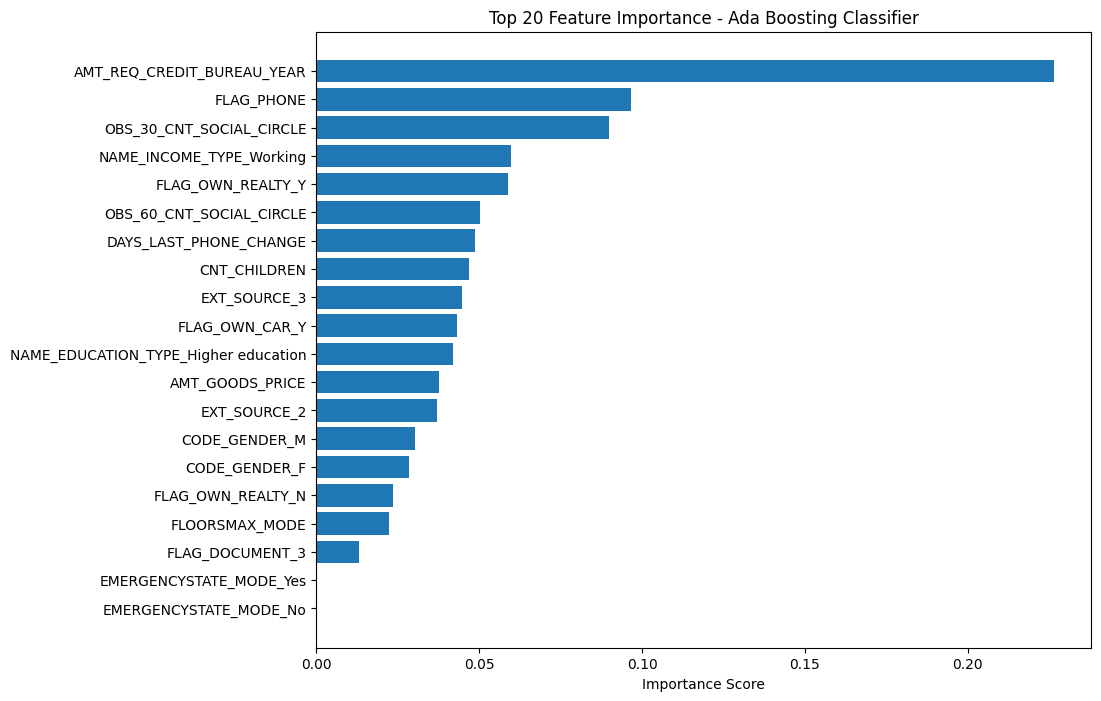

In [48]:
feature_importance = Ada_Boost_Classifier.feature_importances_

# Show top 20 feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True).tail(20)
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 20 Feature Importance - Ada Boosting Classifier')
plt.show()
